Goal:

---
Arbitrary Input Matrix --> 10 x 12 = 120
 - Commanding both phase shift and amplitude
 
Arbitray Mask Matrix--> governed by size of object
 - Bnary map / sparse matrix of object location (0/1s)
 
Derived Filtered Matrix --> 10 x 12 
 - Commanding both phase shift and amplitude

--- 
Control Output --> 30 
 - Actuation profile of phase and amplitude

++++++++++++++
Helpers
 - Converting to/from Matrix from/to Indexed List
 - Indexed List to Controls Index mapping
 - Generating Mask from centroid position
 
Daisy chaining/Electrical Pairing ensure that there is no electrical overlaps across mask
 - Made possible by the size of the levitated object
 
To implement mapping as a matrix or dictionary?
 - start off with dictionary
 - matrix i beleive will be more efficient than for loops
 

In [66]:
%matplotlib inline

In [67]:
import numpy as np
from math import floor, ceil
from matplotlib import pyplot as plt


In [68]:
n_rows, n_cols = 10, 12
fixed_size = (n_rows, n_cols)
mask_width = 5
random_seed = 0
centroid = (5,4) 

def matrixToIndexedList(matrix):
    return matrix.flatten()

def indexedListToMatric(arr):
    return arr.reshape(fixed_size)

def maskFromCentroid(centroid):
    x, y = centroid
    
    x_min = max(0, x - floor(mask_width/2))
    x_max = min(n_cols, x + ceil(mask_width/2))
    
    y_min = max(0, y - floor(mask_width/2))
    y_max = min(n_rows, y + ceil(mask_width/2))
    
    mask = np.zeros((fixed_size))
    mask[y_min:y_max, x_min:x_max] = 1
    
    return mask

def maskMatrix(matrix, mask):
    return np.multiply(matrix, mask)


def outputMaskedMatToControls(mat, mask, mapping):
    control_idxs = mapping[mask > 0]
    control_vals = mat[mask > 0]
    control_dict = {}
    for i,v in enumerate(control_idxs):
        control_dict[v] = control_vals[i]
        
    return control_dict

    
np.random.seed(random_seed)
inputPhaseShifts = np.random.randint(0, 15, fixed_size)*22.5 
inputAmplitudes = np.random.randint(0, 5, fixed_size)

print("Input PhaseShifts:")
print(inputPhaseShifts)
print("")
print("Input Amplitudes:")
print(inputAmplitudes)
print("")

mask = maskFromCentroid(centroid)
print("Mask:")
print(mask)
print("")

maskedPhaseShifts = maskMatrix(inputPhaseShifts, mask)
maskedAmplitude = maskMatrix(inputAmplitudes, mask)

mapping = np.zeros(fixed_size, dtype=np.int8)
submap = np.zeros((int(n_rows/2), int(n_cols/2)))

submap[:, 0] = np.arange(5, 0, -1)#.reshape((n_rows/2, 1))
submap[:, 1] = np.arange(10, 5, -1)#.reshape((n_rows/2, 1))
submap[:, 2] = np.arange(15, 10, -1)#.reshape((n_rows/2, 1))
submap[:, 3] = np.arange(20, 15, -1)#.reshape((n_rows/2, 1))
submap[:, 4] = np.arange(25, 20, -1)#.reshape((n_rows/2, 1))
submap[:, 5] = np.arange(30, 25, -1)#.reshape((n_rows/2, 1))

mapping[0:5, 0:6] = submap
mapping[0:5, 6:12] = submap
mapping[5:10, 0:6] = submap
mapping[5:10, 6:12] = submap

controlPhaseShift = outputMaskedMatToControls(inputPhaseShifts, mask, mapping)
controlAmplitude = outputMaskedMatToControls(inputAmplitudes, mask, mapping)

print("maskedPhaseShifts:")
print(maskedPhaseShifts)
print("")

print("controlPhaseShift")
print(controlPhaseShift)
print("")

print("maskedAmplitude")
print("length:", len(controlAmplitude.items()))
print(maskedAmplitude)
print("")

print("controlAmplitude")
print("length: ",len(controlAmplitude.items()))
print(controlAmplitude)
print("")


Input PhaseShifts:
[[270.  112.5   0.   67.5 247.5  67.5 157.5 202.5  67.5 112.5  45.   90. ]
 [157.5 135.  180.  180.  270.  225.   22.5 135.  157.5 157.5 315.  180. ]
 [ 22.5 112.5 202.5 292.5 180.  202.5  90.   67.5   0.   67.5 112.5 315. ]
 [  0.   45.   67.5 180.   22.5  67.5 292.5  67.5  67.5 315.  157.5   0. ]
 [ 22.5 202.5 202.5   0.  225.   90.  157.5  67.5 315.  247.5  45.  157.5]
 [270.   45.    0.    0.   90.  112.5 112.5 135.  180.   90.   22.5  90. ]
 [202.5 225.  225.  180.   22.5  22.5 157.5 202.5 202.5  67.5 135.  157.5]
 [247.5 315.   45.  247.5   0.  315.   67.5 112.5 270.  202.5 225.   90. ]
 [247.5  90.  135.   90.   90.   67.5 270.   90.   90.  180.  315.   90. ]
 [ 67.5 225.  157.5 292.5 112.5 112.5   0.   22.5 112.5 202.5  67.5   0. ]]

Input Amplitudes:
[[0 1 2 4 2 0 3 2 2 0 1 0]
 [2 2 3 2 3 2 1 2 3 3 3 2]
 [3 4 1 2 3 1 2 1 4 2 3 0]
 [3 2 3 0 0 0 3 2 3 0 4 0]
 [0 2 3 2 3 0 0 0 3 0 2 2]
 [0 4 3 4 0 4 3 3 4 1 3 0]
 [0 0 1 0 4 1 3 1 0 0 4 3]
 [3 1 0 0 1 2 0 3 1 1 

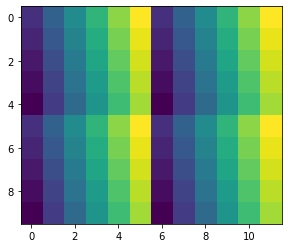

In [69]:
plt.imshow(mapping, interpolation='nearest')
plt.show()

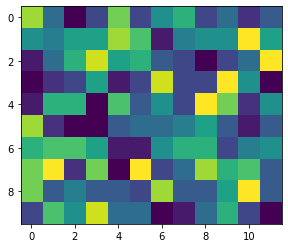

In [70]:
plt.imshow(inputPhaseShifts, interpolation='nearest')
plt.show()

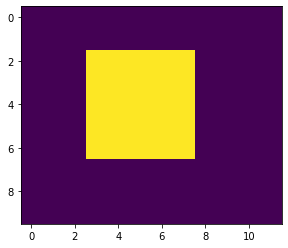

In [71]:
plt.imshow(mask, interpolation='nearest')
plt.show()

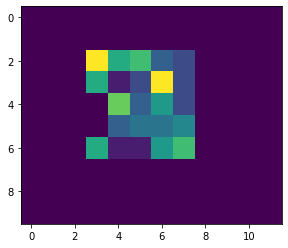

In [72]:
plt.imshow(maskedPhaseShifts, interpolation='nearest')
plt.show()

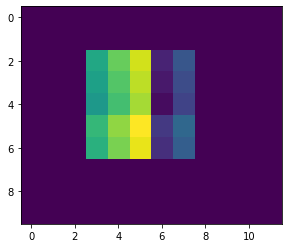

In [73]:
maskedMapping = maskMatrix(mapping, mask)
plt.imshow(maskedMapping, interpolation='nearest')
plt.show()